In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from dtaidistance import dtw
from sklearn.metrics import adjusted_rand_score
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from cobras_ts.cobras_dtw import COBRAS_DTW
from cobras_ts.querier.labelquerier import LabelQuerier
import warnings
warnings.filterwarnings("ignore")

## <font color='GREEN'>Definition of Time Series</font>

### " In general, a time series X = {x1, . . . , xn} is an ordered set of n real-valued numbers. The sequence of numbers (xi for 1 ≤ i ≤ n) is usually a temporal ordering, but other well-defined orderings, such as handwritten text or shapes can also be fruitfully considered as time series "

### " Many types of data that are not true time series can be fruitfully transformed into time series, including DNA, speech, textures, core samples, ASCII text, historical handwriting, novels and even shapes."

## <font color='GREEN'>Time Series Clustering</font>
### <font color='BLUE'>" Clustering is an ill-defined problem, There is no objectively ’correct clustering algorithm, because clustering is in the eye of the beholder! "</font>

## <font color='GREEN'>Different type of Distance measurement</font>
#### The choice of an appropriate metric does influence the shape of the clusters, as some elements might be close to each other according to one distance and farther away according to another.
### <font color='BLUE'>Euclidean :</font> For continuous features. Needs sequences of equal length uniformly spaces over time
### <font color='BLUE'>Pearson's correlation based</font>: Where trends or shape formed by the ordered succession are important
### <font color='BLUE'>Mahalanobis:</font> Improvemnet over Euclidean distance, utilizes the covariance matrix of input squences, mostly used in classification or outlier detection
### <font color='BLUE'>Dynamic Time Warping (DTW)</font> Enables comparison of two time series that have similar shapes but are locally out of shape. " Recent work strongly suggests that DTW is the best distance measure for many data mining problems, and very recent independent work has empirically confirmed this with exhaustive experiments "
### <font color='BLUE'>Others :</font> Chebyshev distance, Minkowski distance, Longest Common Sub-Sequence(LCSS), Cosine similarity etc.

### <font color='RED'>Differece between Measure and Metric</font>

###  " A metric is a function that behaves according to a specific set of conditions (non-negativity, Constancy of Self-Similarity, symmetry, triangle inequality), and is a concrete way of describing what it means for elements of some space to be ‘close to’ or ‘far away from’ each other. " Non-Metrics can sometimes give pathological solutions when clustering or classifying data.

## Euclidean Distance is a metric, while DTW distance is a semi-metric
### How is it DTW distance calculated?
![](ED_DTW.png)

# <font color='GREEN'>Time Series Clustering Approaches</font>
### Feature Based (SVD, PCA), Model Based (ARMA, ARIMA), Raw Data (Distance Measure)
### Unsupervised, Semi-Supervised

## Unsupervised Clustering
### Approaches to unsupervised learning include clustering (e.g. k-means, and hierarchical clustering), hidden Markov models, as well as dimensionality reduction methods (e.g. principal component analysis and singular value decomposition).

## Sample Dataset

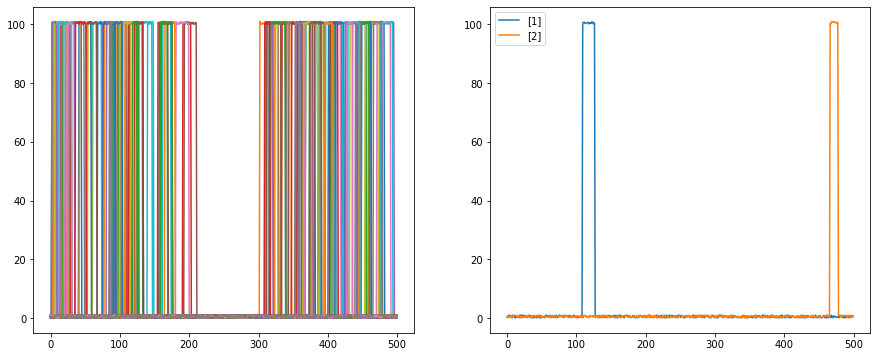

In [2]:
# Load and plot sample dataset
data1 = pd.read_csv('dataset1.csv',header=None)
TS = data1.iloc[:,0:-1]
TS_class = data1.iloc[:,-1:].values
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
for i in range(len(TS)):
    ax.plot(TS.iloc[i,:], label=TS_class[i])

ax = fig.add_subplot(122)
ax.plot(TS.iloc[0,:], label=TS_class[0])
ax.plot(TS.iloc[-1,:], label=TS_class[-1])
ax.legend()

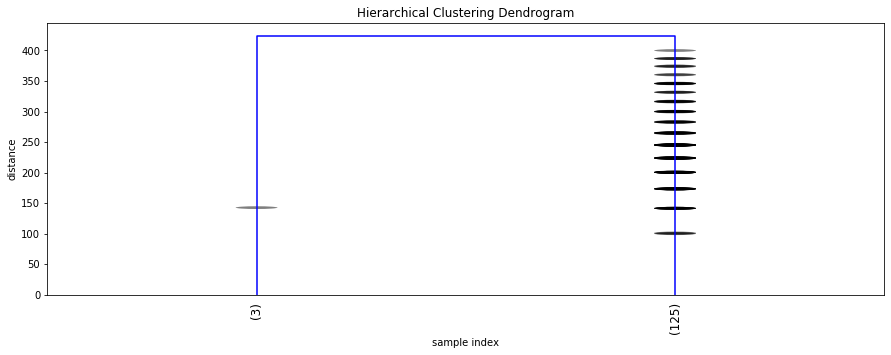

Cluster 2 number of entries 125
Cluster 1 number of entries 3


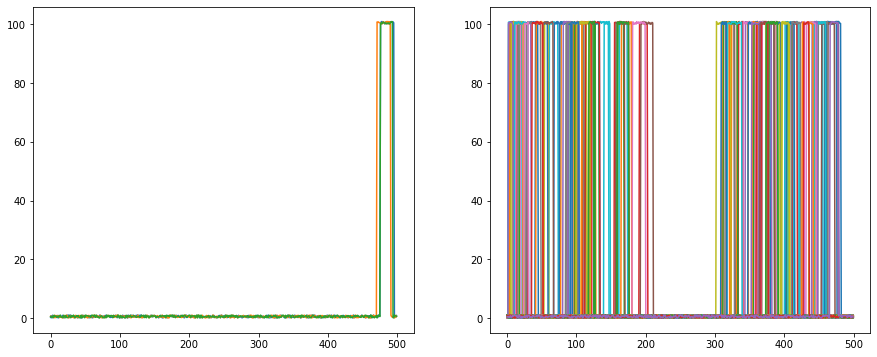

In [3]:
# Compare Clustering using Euclidean Distance and DTW Distance
# Relevance of warping window in DTW for clustering
Z = hac.linkage(TS, method='single', metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z, p=2, truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    show_contracted=True
)
plt.show()

# check the results
# Extracting 2 clusters
results = fcluster(Z, 2, criterion='maxclust')
s = pd.Series(results)
clusters = s.unique()
fig = plt.figure(figsize=(15,6))
for c in clusters:
    ax = fig.add_subplot(1,len(clusters),c)
    cluster_indeces = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
    ax.plot(TS.T.iloc[:,cluster_indeces])

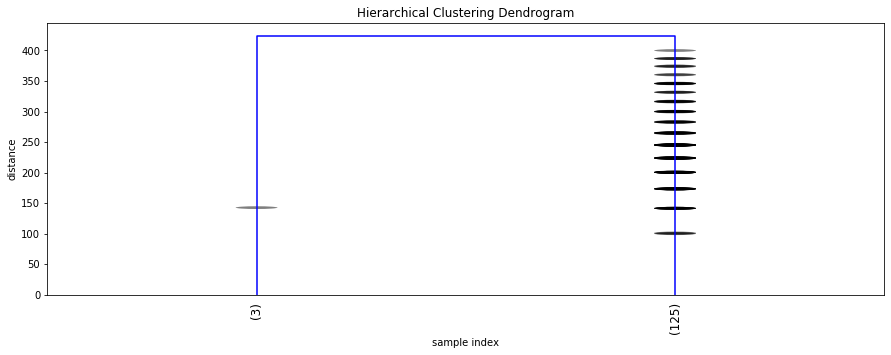

Cluster 2 number of entries 125
Cluster 1 number of entries 3


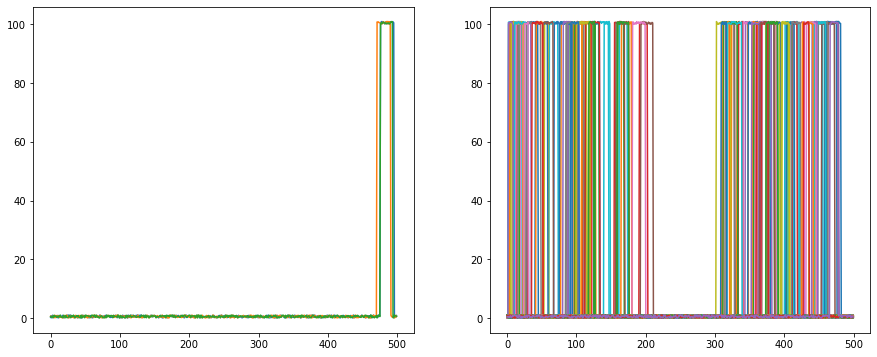

In [4]:
# Define metric
def dtw_distance(ts1, ts2):
   r = dtw.distance(ts1, ts2, window=1, use_c=True) # Window = 1, Corresponds to Euclidean Distance
   return r

Z = hac.linkage(TS,  method='single', metric=dtw_distance)
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z, p=2, truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    show_contracted=True
)
plt.show()

# check the results
# Extracting 2 clusters
results = fcluster(Z, 2, criterion='maxclust')
s = pd.Series(results)
clusters = s.unique()
fig = plt.figure(figsize=(15,6))
for c in clusters:
    ax = fig.add_subplot(1,len(clusters),c)
    cluster_indeces = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
    ax.plot(TS.T.iloc[:,cluster_indeces])

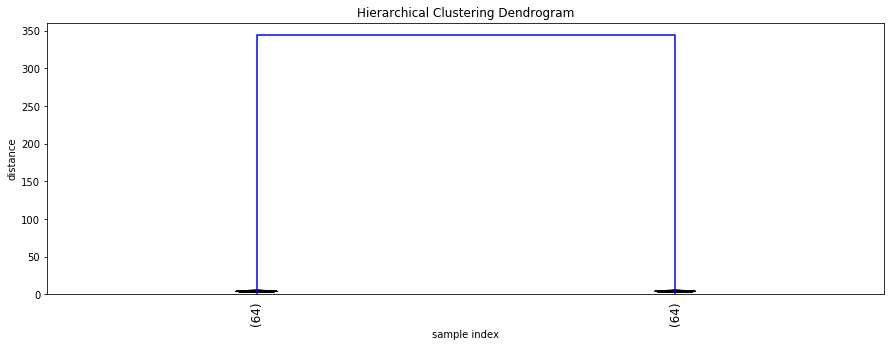

Cluster 2 number of entries 64
Cluster 1 number of entries 64


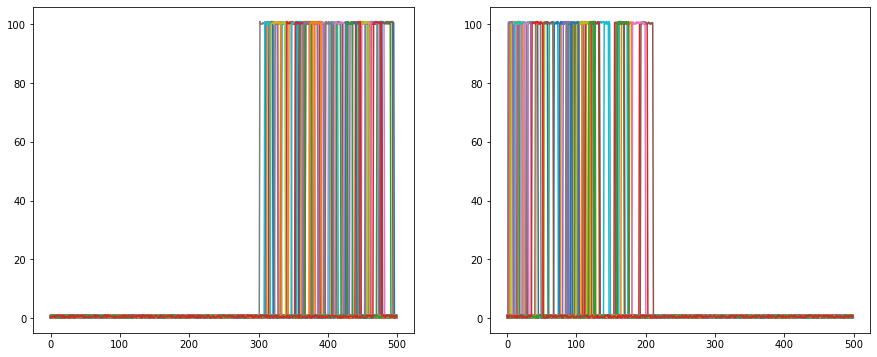

In [5]:
# Define metric
def dtw_distance(ts1, ts2):
   r = dtw.distance(ts1, ts2, window=50, use_c=True) # Window = 50, Corresponds to 10% of Timeseries length(500)
   return r

Z = hac.linkage(TS,  method='single', metric=dtw_distance)
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z, p=2, truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    show_contracted=True
)
plt.show()

# check the results
# Extracting 2 clusters
results = fcluster(Z, 2, criterion='maxclust')
s = pd.Series(results)
clusters = s.unique()
fig = plt.figure(figsize=(15,6))
for c in clusters:
    ax = fig.add_subplot(1,len(clusters),c)
    cluster_indeces = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
    ax.plot(TS.T.iloc[:,cluster_indeces])

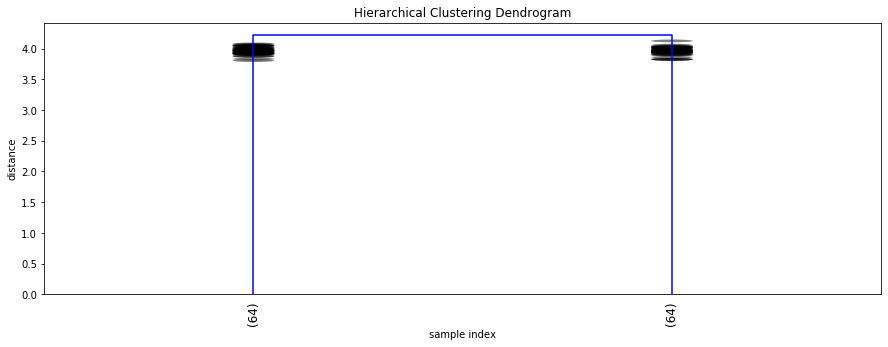

Cluster 2 number of entries 64
Cluster 1 number of entries 64


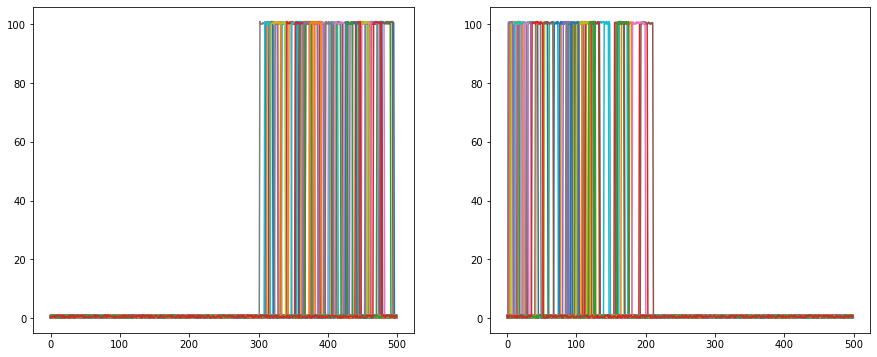

In [6]:
# Define metric
def dtw_distance(ts1, ts2):
   r = dtw.distance(ts1, ts2, window=500, use_c=True) # Window = 500 or None, Corresponds to enntire length of Timeseries
   return r

Z = hac.linkage(TS, method='single', metric=dtw_distance)
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z, p=2, truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    show_contracted=True
)
plt.show()

# check the results
# Extracting 2 clusters
results = fcluster(Z, 2, criterion='maxclust')
s = pd.Series(results)
clusters = s.unique()
fig = plt.figure(figsize=(15,6))
for c in clusters:
    ax = fig.add_subplot(1,len(clusters),c)
    cluster_indeces = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
    ax.plot(TS.T.iloc[:,cluster_indeces])

### <font color='GREEN'>Different Versions of DTW</font>
### <font color='GREEN'>Challenges with DTW</font>
#### <font color='BLUE'>Order of Time and Memory Complexity ~O(mn)</font> : Optimizing Warping window 
#### <font color='BLUE'>Error in distnace calculation where two Time Series has difference only at boundary</font> : Apply relaxation at boundary 
![](DTW_limitation1.png)

## <font color='GREEN'>Semi-supervised Clustering</font>
### In this approach, the algorithm is provided with some pieces of a priori information in the form of cannot-link-constraints (or must-link-constraints) that describe that some instances can not be (or must be) in the same cluster.
![](constrained_clustering.png)
![](constrained_clustering2.png)

## Sample Dataset 1

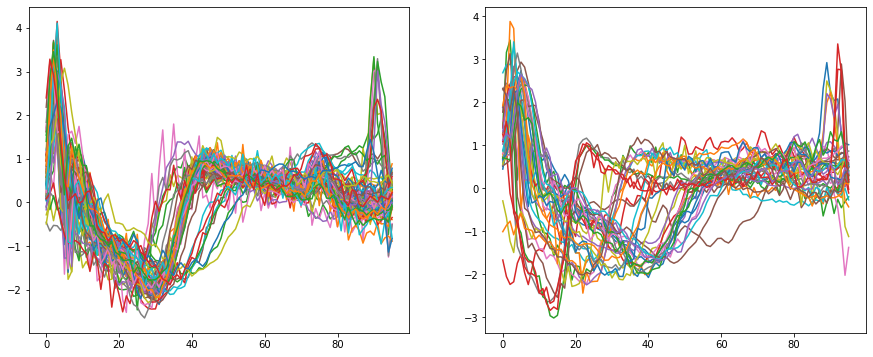

In [7]:
# load the data
data = np.loadtxt('ECG200_TEST.txt')
series = data[:,1:]
labels = data[:,0]

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(len(series)):
    if labels[i] == 1:
        ax1.plot(series[i,:])
    else:
        ax2.plot(series[i,:])

In [8]:
alpha = 0.5
window = 10

# construct the affinity matrix (similarity matrix)
dists = dtw.distance_matrix(series, window=int(0.01 * window * series.shape[1]))
dists[dists == np.inf] = 0
dists = dists + dists.T - np.diag(np.diag(dists))
affinities = np.exp(-dists * alpha)

In [9]:
# initialise cobras_dtw with the precomputed affinities
budget = 50
clusterer = COBRAS_DTW(affinities, LabelQuerier(labels), budget)
clustering, intermediate_clusterings, runtimes, ml, cl = clusterer.cluster()

pred_labels = clustering.construct_cluster_labeling()
print('Adjusted Rand Score :', adjusted_rand_score(pred_labels,labels))

Adjusted Rand Score : 0.32864746505464554


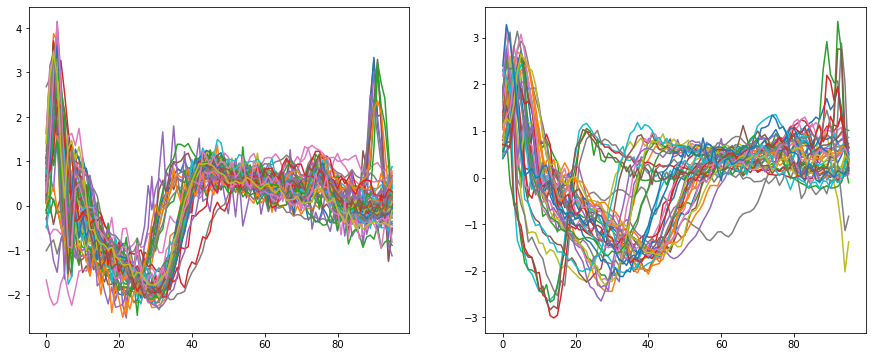

In [10]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(len(pred_labels)):
    if pred_labels[i] == 0:
        ax1.plot(series[i,:])
    else:
        ax2.plot(series[i,:])

Adjusted Rand Score : 0.8821083056742698


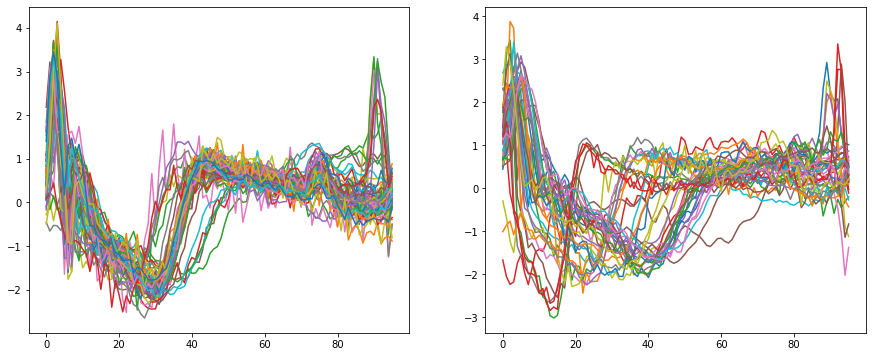

In [11]:
# initialise cobras_dtw with the precomputed affinities
budget = 200
clusterer = COBRAS_DTW(affinities, LabelQuerier(labels), budget)
clustering, intermediate_clusterings, runtimes, ml, cl = clusterer.cluster()

pred_labels = clustering.construct_cluster_labeling()
print('Adjusted Rand Score :',adjusted_rand_score(pred_labels,labels))

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(len(pred_labels)):
    if pred_labels[i] == 0:
        ax1.plot(series[i,:])
    else:
        ax2.plot(series[i,:])

# Sample Dataset 2

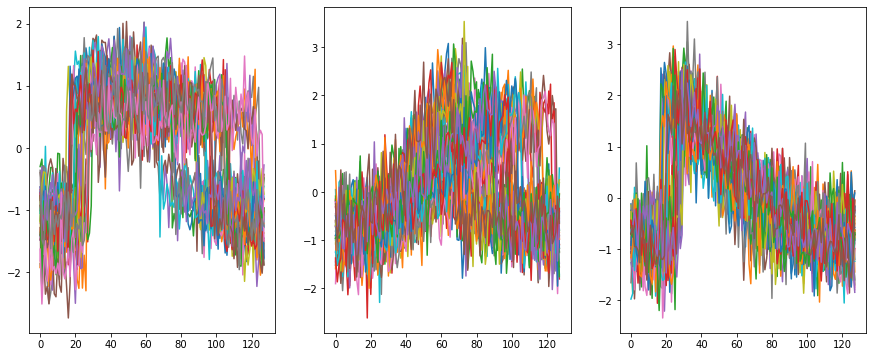

In [12]:
# load the data
data = np.loadtxt('CBF_TEST.txt')
series = data[0:100,1:]
labels = data[0:100,0]

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for i in range(len(series)):
    if labels[i] == 1.0:
        ax1.plot(series[i,:])
    elif labels[i] == 2.0:
        ax2.plot(series[i,:])
    else:
        ax3.plot(series[i,:])

In [13]:
alpha = 0.5
window = 10

# construct the affinity matrix (similarity matrix)
dists = dtw.distance_matrix(series, window=int(0.01 * window * series.shape[1]))
dists[dists == np.inf] = 0
dists = dists + dists.T - np.diag(np.diag(dists))
affinities = np.exp(-dists * alpha)

Adjusted Rand Score : 0.3533451612852623


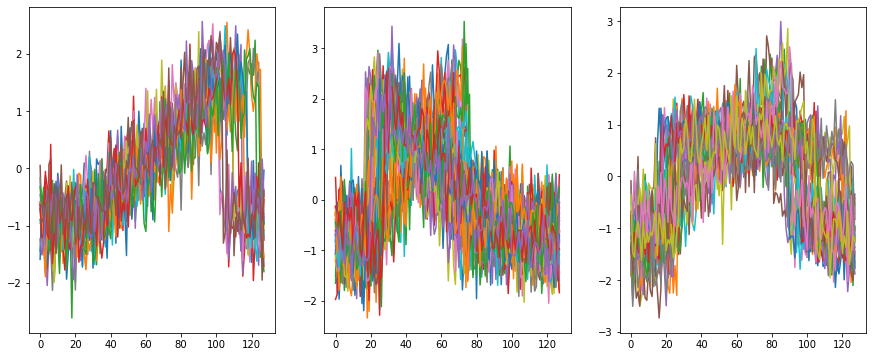

In [14]:
budget = 5
clusterer = COBRAS_DTW(affinities, LabelQuerier(labels), budget)
clustering, intermediate_clusterings, runtimes, ml, cl = clusterer.cluster()

pred_labels = clustering.construct_cluster_labeling()
print('Adjusted Rand Score :', adjusted_rand_score(pred_labels,labels))

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
for i in range(len(pred_labels)):
    if pred_labels[i] == 0:
        ax1.plot(series[i,:])
    elif pred_labels[i] == 1:
        ax2.plot(series[i,:])
    elif pred_labels[i] == 2:
        ax3.plot(series[i,:])

Adjusted Rand Score : 0.7956150130063173


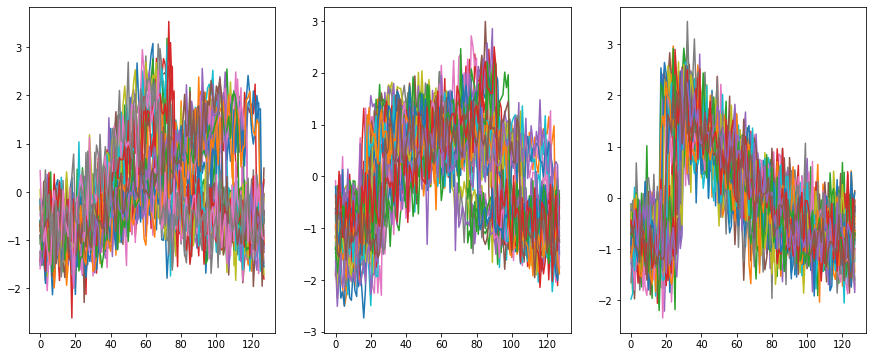

In [15]:
budget = 20
clusterer = COBRAS_DTW(affinities, LabelQuerier(labels), budget)
clustering, intermediate_clusterings, runtimes, ml, cl = clusterer.cluster()

pred_labels = clustering.construct_cluster_labeling()
print('Adjusted Rand Score :', adjusted_rand_score(pred_labels,labels))

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
for i in range(len(pred_labels)):
    if pred_labels[i] == 0:
        ax1.plot(series[i,:])
    elif pred_labels[i] == 1:
        ax2.plot(series[i,:])
    elif pred_labels[i] == 2:
        ax3.plot(series[i,:])
        

## <font color='GREEN'>Evaluation methods</font>
### <font color='BLUE'>Internal evaluation methods: </font> Assign the best score to the algorithm that produces clusters with high similarity within a cluster and low similarity between clusters. Example: Davies-Bouldin and Dunn index etc
### <font color='BLUE'>External evaluation methods: </font> Uses known class labels or external benchmarks to score clustering results.  Example: Adjusted Rand Index

### <font color='BLUE'>Adjusted Rand Index: </font> Rand Index(RI) "correct-for-chance". The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). 
![](RI.png)


# References

### https://sites.google.com/site/dtwclustering/
### Time Series Distance Measures, Segmentation, Classification, and Clustering of Temporal Data, vorgelegt von, Dipl.-Inf. Stephan Spiegel
### Semi-Supervision Dramatically Improves Time Series Clustering under Dynamic Time Warping, , Hoang Anh Dau, Nurjahan Begum, Eammon Keogh
### Dataset: http://timeseriesclassification.com/description.php?Dataset=ECG200
### Dataset: http://timeseriesclassification.com/description.php?Dataset=CBF